# Importing libraries 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import matplotlib

In [4]:
# loading the data set

In [5]:
df= pd.read_csv('hotel_booking.csv')

In [6]:
# Exploratory data anlysis

In [7]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [8]:
df.shape

(119390, 36)

In [9]:
print(list(df.isnull().sum()))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 488, 0, 0, 0, 0, 0, 0, 0, 0, 0, 16340, 112593, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [11]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [12]:
unq= df.describe(include ='object')
unq.head()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,name,email,phone-number,credit_card
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,81503,115889,119390,9000
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,Michael Johnson,Michael.C@gmail.com,669-792-1661,************4923
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,48,6,1,28


In [13]:
for col in unq.columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [14]:
df.drop(['company','agent'], axis=1, inplace=True)

In [15]:
df.dropna(inplace= True)

In [16]:
df.shape

(118898, 34)

In [17]:
print(list(df.isnull().sum()))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [18]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


<Axes: >

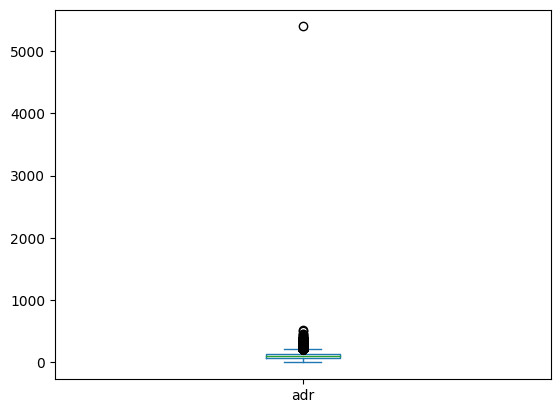

In [19]:
df['adr'].plot(kind= 'box')

In [20]:
df= df[df['adr']<5000]

In [21]:
# Data analysis and visualizations

In [37]:
import plotly


0    0.628653
1    0.371347
Name: is_canceled, dtype: float64


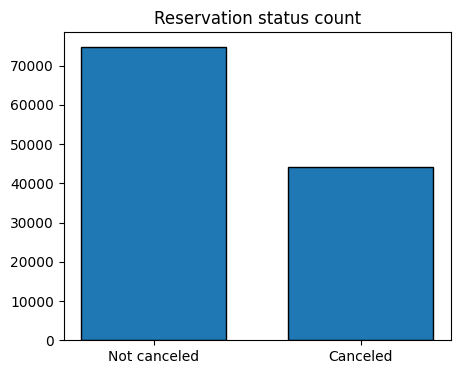

In [39]:
cancel_percent= df['is_canceled'].value_counts(normalize = True)
print(cancel_percent)

plt.figure(figsize= (5,4))
plt.title('Reservation status count')
plt.bar(['Not canceled', 'Canceled'], df['is_canceled'].value_counts(), edgecolor='k', width = 0.7)

plt.show()


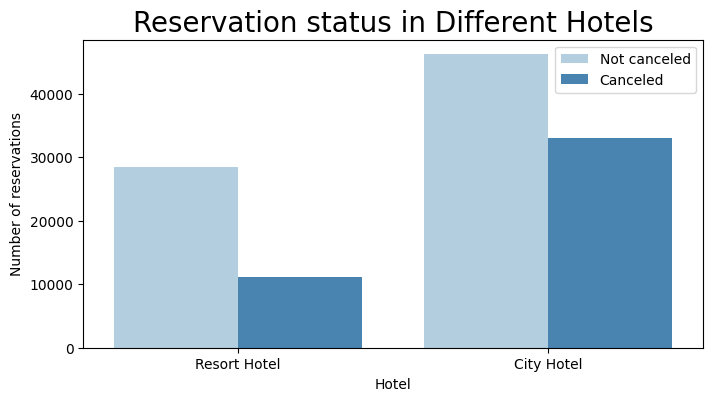

<Figure size 640x480 with 0 Axes>

In [23]:
plt.figure(figsize= (8,4))
ax1 = sns.countplot(x ='hotel', hue = 'is_canceled', data= df, palette= 'Blues')
legebd_labels = ax1.get_legend_handles_labels()
# ax1.legend(bbox_to_anchor(1,1))
plt.title('Reservation status in Different Hotels', size = 20)
plt.xlabel('Hotel')
plt.ylabel('Number of reservations')
plt.legend(['Not canceled', 'Canceled'])
plt.show()
plt.close()  # Close the plot
plt.savefig('plot.png')

In [24]:
resort_hotel= df[df['hotel']== 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [25]:
city_hotel= df[df['hotel']== 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

In [26]:
resort_hotel= resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel= city_hotel.groupby('reservation_status_date')[['adr']].mean()

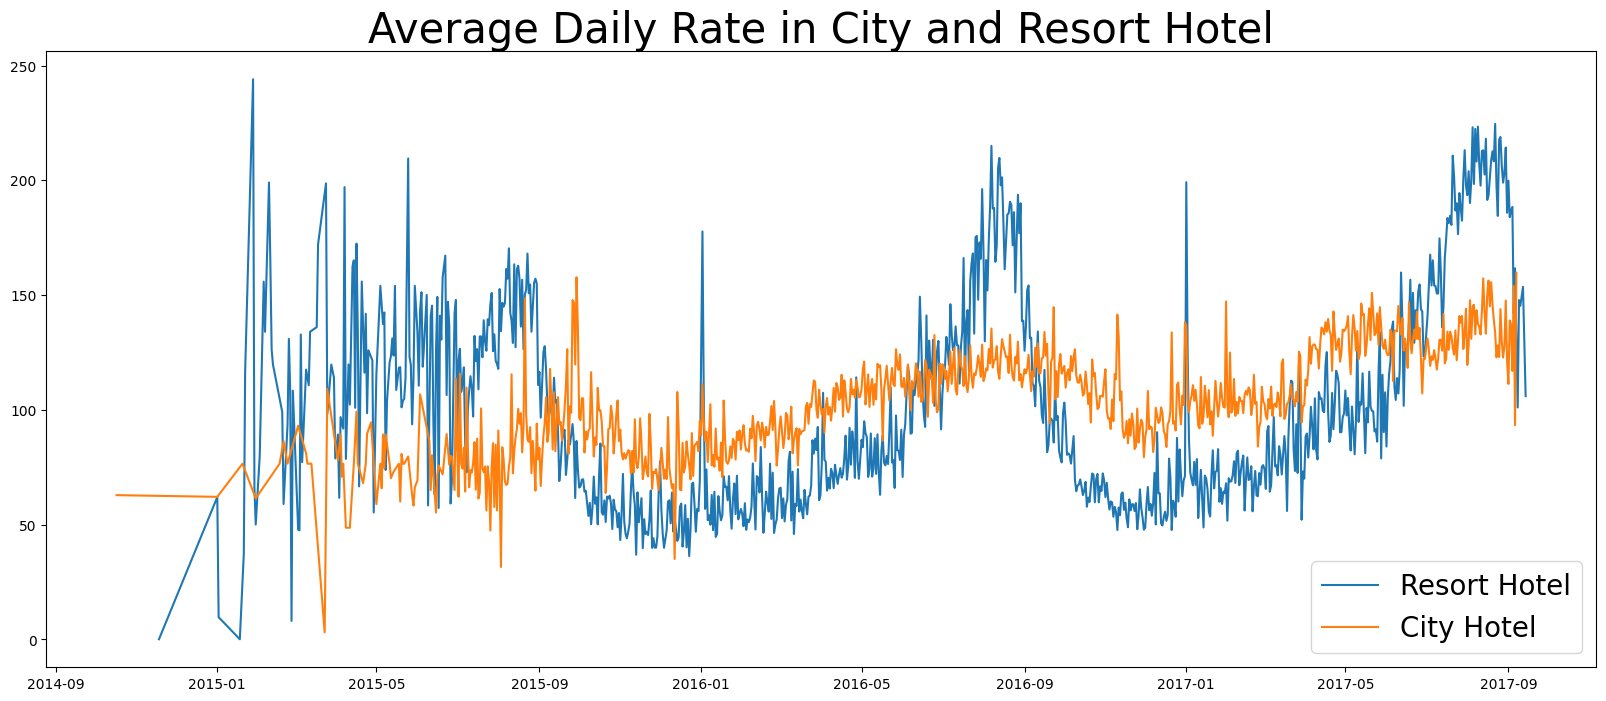

In [27]:
plt.figure(figsize= (20,8))
plt.title('Average Daily Rate in City and Resort Hotel', fontsize = 30)
plt.plot(resort_hotel.index, resort_hotel['adr'], label= 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label= 'City Hotel')

plt.legend(fontsize= 20)
plt.show()

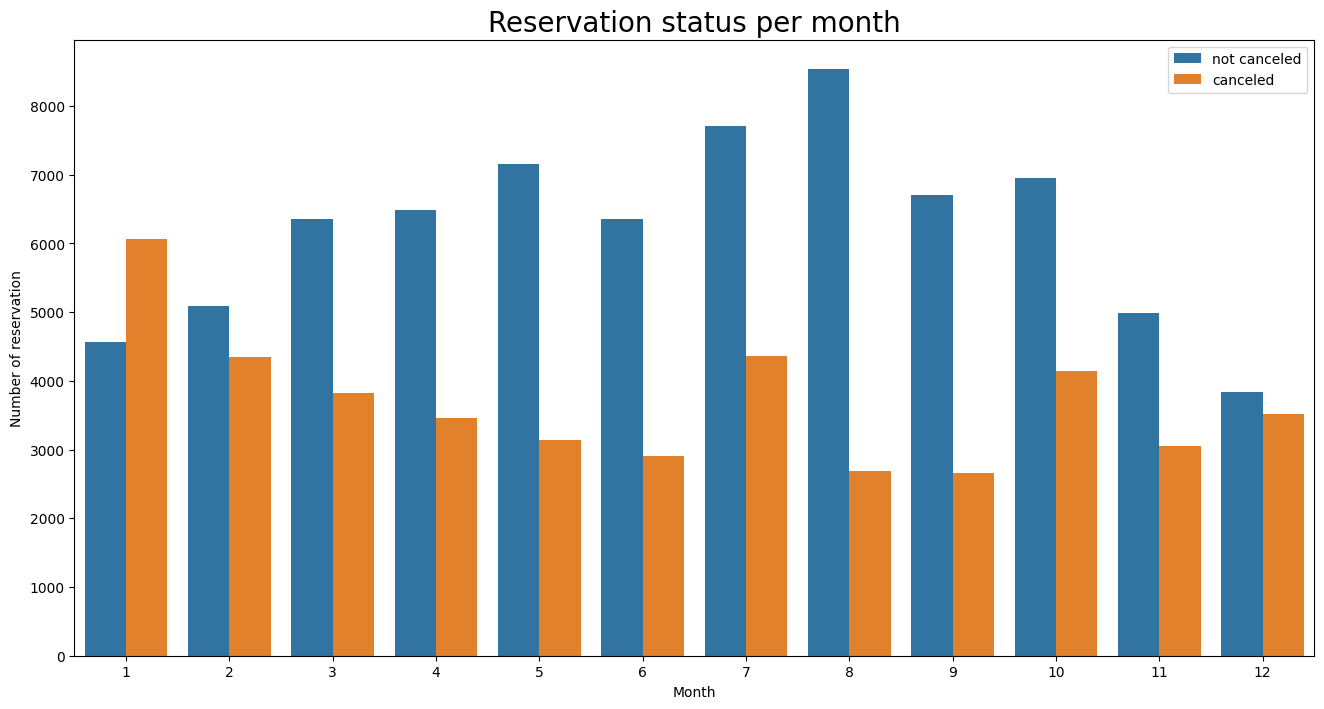

In [28]:
df['month']= df['reservation_status_date'].dt.month
plt.figure(figsize= (16,8))
ax1= sns.countplot(x= 'month', hue = 'is_canceled', data= df)
plt.title('Reservation status per month', fontsize= 20)
plt.xlabel('Month')
plt.ylabel('Number of reservation')

plt.legend(['not canceled','canceled'])
plt.show()

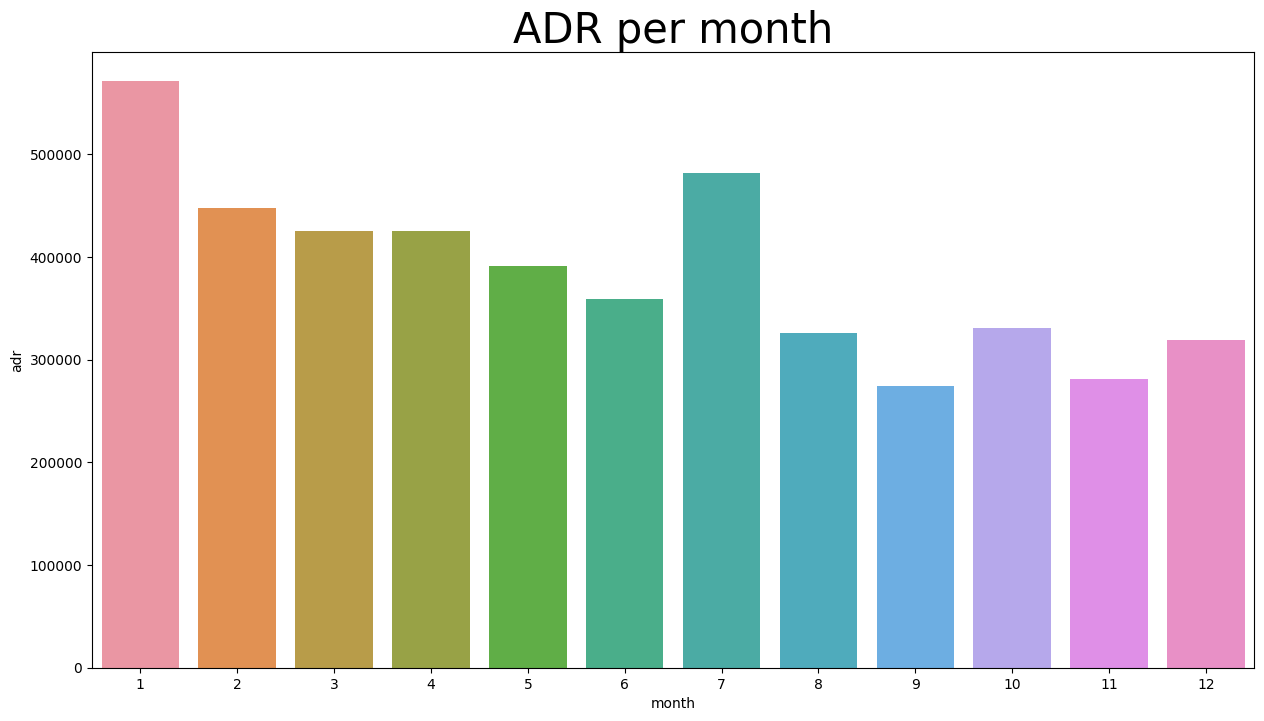

<Figure size 640x480 with 0 Axes>

In [29]:
plt.figure(figsize= (15,8))
plt.title('ADR per month', fontsize = 30)
sns.barplot('month', 'adr', data= df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index())
# plt.legend(fontsize = 20)
plt.show()
plt.close()  # Close the plot
plt.savefig('plot.png')

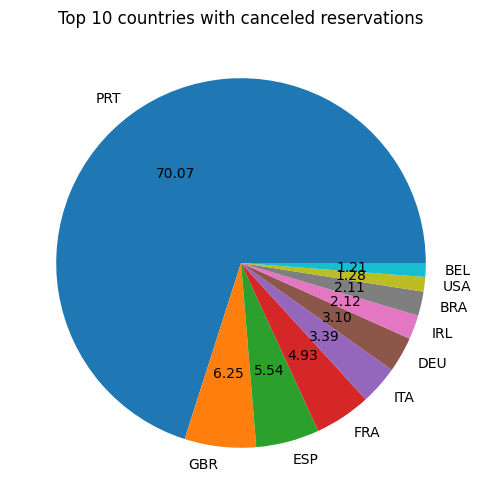

In [30]:
canceled_data=  df[df['is_canceled']==1]
top_10_country = canceled_data['country'].value_counts()[:10]
plt.figure(figsize = (6,6))
plt.title('Top 10 countries with canceled reservations')
plt.pie(top_10_country, autopct= '%.2f', labels= top_10_country.index)
plt.show()

In [31]:
df['market_segment'].value_counts()

Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [32]:
df['market_segment'].value_counts(normalize= True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

In [33]:
canceled_data['market_segment'].value_counts(normalize = True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

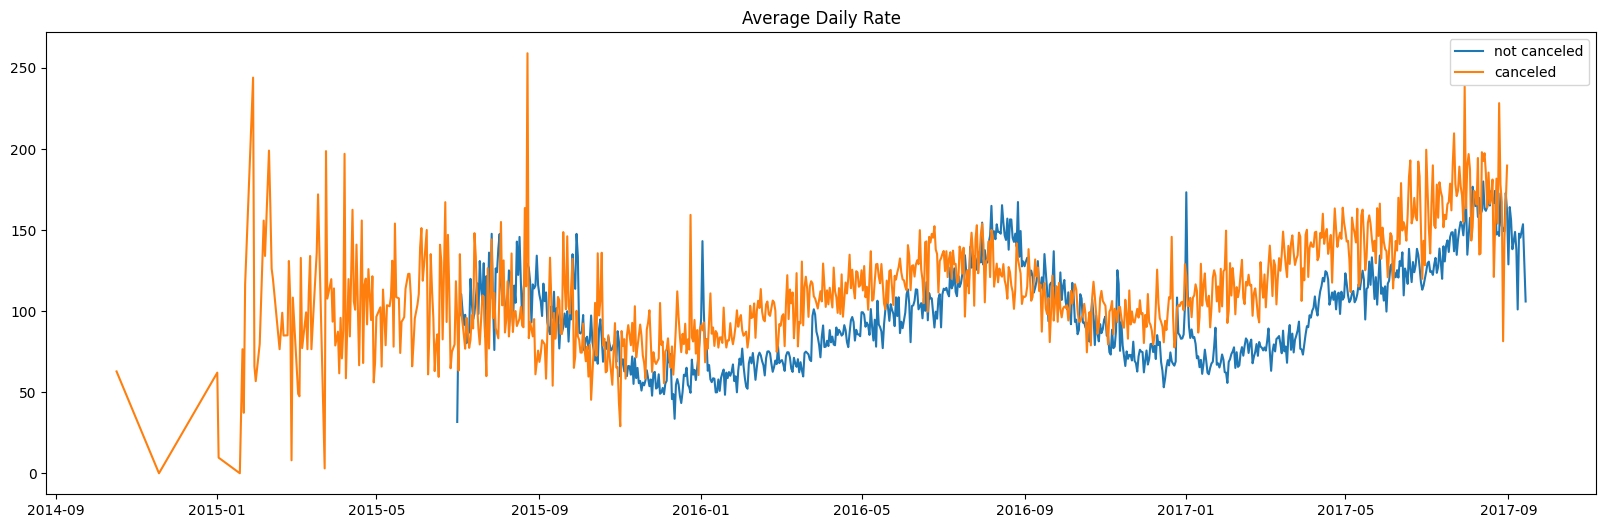

In [34]:
canceled_df_adr = canceled_data.groupby('reservation_status_date')[['adr']].mean()
canceled_df_adr.reset_index(inplace=True)
canceled_df_adr.sort_values('reservation_status_date', inplace= True)

not_canceled_data = df[df['is_canceled']==0]

not_canceled_df_adr = not_canceled_data.groupby('reservation_status_date')[['adr']].mean()
not_canceled_df_adr.reset_index(inplace=True)
not_canceled_df_adr.sort_values('reservation_status_date', inplace= True)

plt.figure(figsize= (20,6))
plt.title('Average Daily Rate')
plt.plot(not_canceled_df_adr['reservation_status_date'], not_canceled_df_adr['adr'], label ='not canceled')
plt.plot(canceled_df_adr['reservation_status_date'], canceled_df_adr['adr'], label ='canceled')

plt.legend()
plt.show()

In [35]:
canceled_df_adr= canceled_df_adr[(canceled_df_adr['reservation_status_date']>'2016') & (canceled_df_adr['reservation_status_date']<'2017-09')]
not_canceled_df_adr= not_canceled_df_adr[(not_canceled_df_adr['reservation_status_date']>'2016') & (not_canceled_df_adr['reservation_status_date']<'2017-09')]

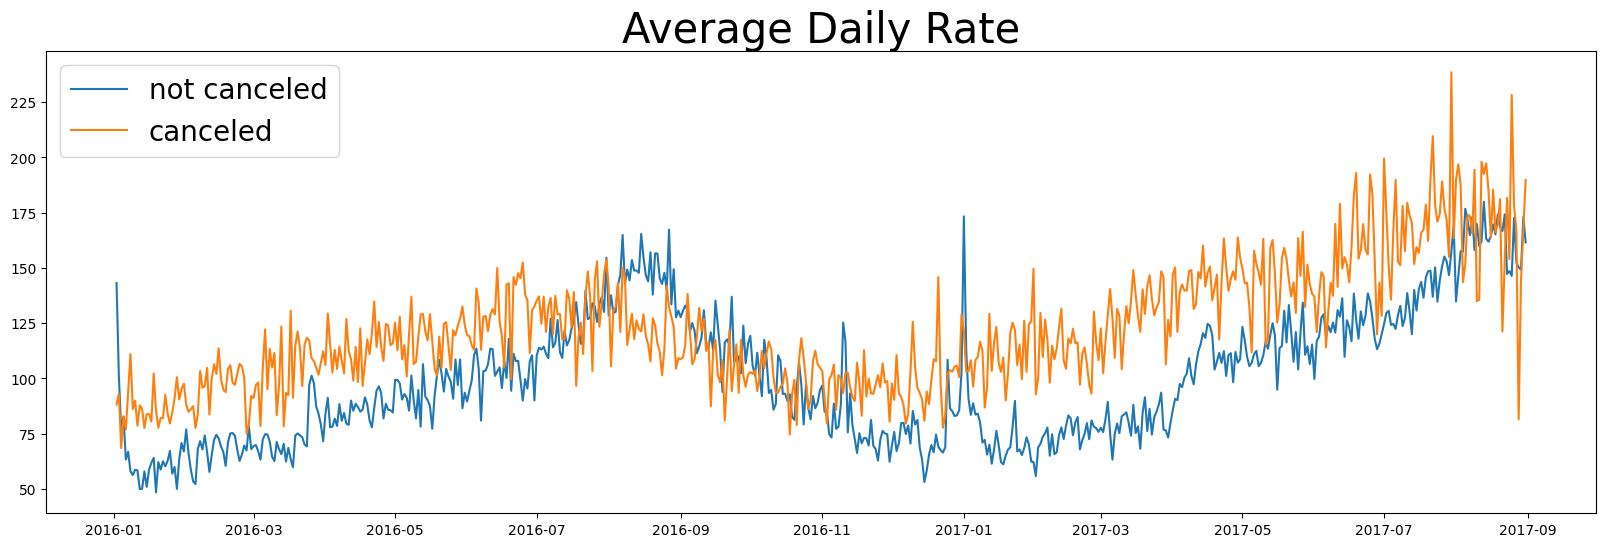

In [36]:
plt.figure(figsize= (20,6))
plt.title('Average Daily Rate', fontsize= 30)
plt.plot(not_canceled_df_adr['reservation_status_date'], not_canceled_df_adr['adr'], label ='not canceled')
plt.plot(canceled_df_adr['reservation_status_date'], canceled_df_adr['adr'], label ='canceled')

plt.legend(fontsize= 20)
plt.show()